In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from ggplot import *
%matplotlib inline
import re
from sklearn.model_selection import train_test_split

In [87]:
def get_price(x):
    try:
        x = float(re.sub("[a-zA-Z$]","",x))
        return x
    except:
        return np.nan

In [88]:
cpu = pd.read_csv("../data/Intel_CPUs.csv")
cpu["price"] = cpu["Recommended_Customer_Price"].apply(get_price)
cpu.drop(["Recommended_Customer_Price","Support_4k","Processor_Graphics_","OpenGL_Support"],axis=1,inplace=True)
cpu.head()

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,...,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit,price
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,2,4.0,1.30 GHz,3.60 GHz,...,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,393.0
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,4,8.0,1.60 GHz,3.40 GHz,...,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,297.0
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,4,8.0,1.80 GHz,4.00 GHz,...,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,409.0
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,4,8.0,3.60 GHz,3.80 GHz,...,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes,305.0
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,2,4.0,1.20 GHz,3.30 GHz,...,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,281.0


# Create a faceted plot in ggplot use size, shape and color as well as facets

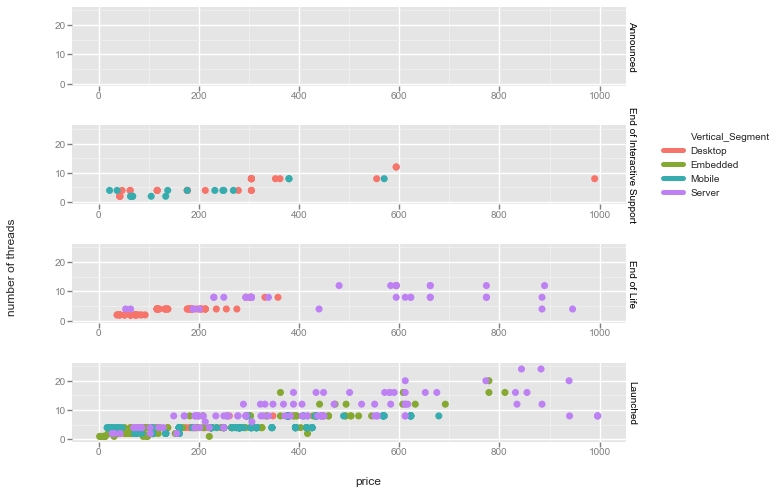

<ggplot: (-9223371866016105521)>

In [89]:
p = ggplot(cpu,aes(x="price", y="nb_of_Threads ", color="Vertical_Segment")) + geom_point(size=50) \
+ facet_grid("Status")
p + xlab("price") + ylab("number of threads")

# Create a Correlation Heatmap in Seaborn 

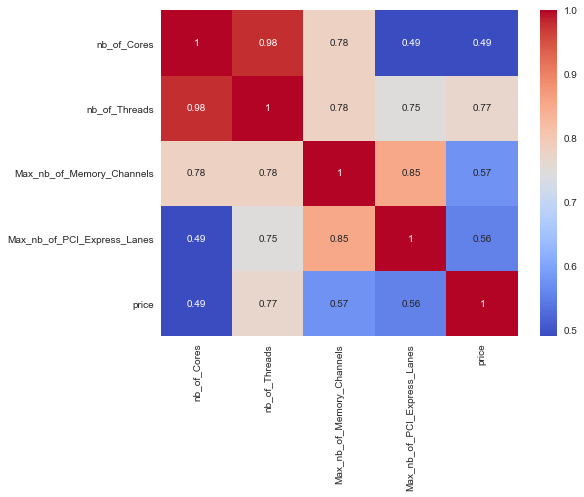

In [90]:
plt.figure(figsize = (8,6))
sns.heatmap(cpu.corr(),cmap='coolwarm',annot=True)

# Create your own Test and Training sets 

In [84]:
X = cpu.drop("price",axis=1)
y = cpu["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head(3)

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,...,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
1170,Intel® Xeon® Processor W Family,Server,W-2155,Launched,Q3'17,14 nm,10,20.0,3.30 GHz,4.50 GHz,...,68,Yes,Yes,Yes,64-bit,"Intel® SSE4.2, Intel® AVX, Intel® AVX2, Intel®...",Yes,Yes,Yes,Yes
278,Legacy Intel® Pentium® Processor,Mobile,T2130,End of Interactive Support,Q2'07,65 nm,2,NaN,1.86 GHz,NaN,...,100°C,No,Yes,No,32-bit,NaN,No,NaN,NaN,Yes
1919,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,NaN,180 nm,1,NaN,633 MHz,NaN,...,82°C,No,No,No,32-bit,NaN,No,NaN,NaN,No
